In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [18]:
X_train = np.load("X_part2.npy")
X_val = np.load("X_val_part2.npy")
y_val = np.load("y_val_part2.npy")

In [19]:
print ('The shape of X_train_high is:', X_train.shape)
print ('The shape of X_val_high is:', X_val.shape)
print ('The shape of y_val_high is: ', y_val.shape)

The shape of X_train_high is: (1000, 11)
The shape of X_val_high is: (100, 11)
The shape of y_val_high is:  (100,)


(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  1.,  3.,  3.,  5.,
         9.,  4., 11., 14., 18., 30., 30., 38., 39., 49., 43., 35., 57.,
        60., 59., 58., 59., 49., 51., 36., 42., 43., 38., 18., 20., 19.,
        16., 13.,  9.,  5.,  4.,  1.,  0.,  1.,  1.,  1.,  2.]),
 array([-38.59361317, -37.54794687, -36.50228057, -35.45661428,
        -34.41094798, -33.36528169, -32.31961539, -31.27394909,
        -30.2282828 , -29.1826165 , -28.13695021, -27.09128391,
        -26.04561762, -24.99995132, -23.95428502, -22.90861873,
        -21.86295243, -20.81728614, -19.77161984, -18.72595354,
        -17.68028725, -16.63462095, -15.58895466, -14.54328836,
        -13.49762206, -12.45195577, -11.40628947, -10.36062318,
         -9.31495688,  -8.26929058,  -7.22362429,  -6.17795799,
         -5.1322917 ,  -4.0866254 ,  -3.0409591 ,  -1.99529281,
         -0.94962651,   0.09603978,   1.14170608,   2.18737237,
          3.23303867,   4.27870497,   5.32437126,   6.37003756,
          7.

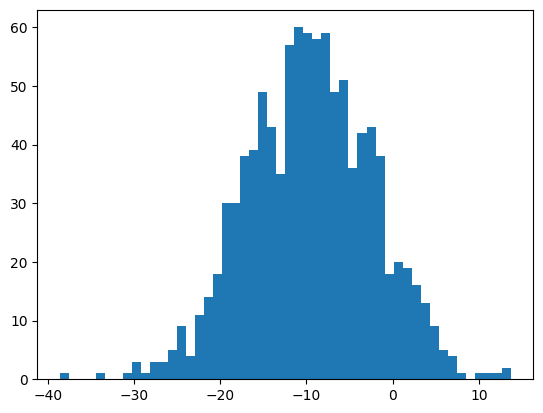

In [20]:
plt.hist(X_train[:,1],bins=50) # Check by x.hist(bins=50) if features are somewhat gaussian if not then try and convert by taking np.log(x+c) or x**(1/c)

In [21]:
# Do by error analysis manually see through anomalies to include new features earlier ignored or make new features (x1**2)/x2 till get required accuracy

In [22]:
# different from supervised as in supervised more examples are there for y=1 here very very few
# supervised algorithm learns from present examples to classify future examples if similar to training examples but future anomalies vary different so this algorithm works better in that case

In [23]:
def estimate_gaussian(X):
  m,n=X.shape
  mu=np.zeros(n)
  var=np.zeros(n)
  for i in range(m):
    mu+=X[i]
  mu/=m
  for i in range(m):
    var+=(X[i]-mu)**2
  var/=m
  return mu,var

In [24]:
def estimate_probability(X, mu, var):
    k = len(mu)
    if var.ndim == 1:
        var = np.diag(var)
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    return p

In [25]:
def optimal_epsilon(y_val, p_val):
    best_epsilon = 0
    best_F1 = 0
    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        predictions=(p_val<epsilon)
        F1=metrics.f1_score(predictions,y_val)
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
    return best_epsilon, best_F1

In [27]:
mu, var = estimate_gaussian(X_train)
print(f"mu and variance for the training data is {mu} and {var}")

mu and variance for the training data is [  4.93940034  -9.63726819  13.81470749 -10.4644888   -7.95622922
  10.19950372  -6.01940755   7.96982896  -6.2531819    2.32451289
   8.47372252] and [60.97489373 53.20572186 58.51546272 84.20403725 65.26859177 89.57487757
 55.63349911 87.16233783 29.62926829 70.7852052  50.50356719]


In [28]:
p_val= estimate_probability(X_val, mu, var)

epsilon, F1 = optimal_epsilon(y_val, p_val)
print(f"The optimal F1 score we obtain is {F1} and epsilon value is {epsilon}")

The optimal F1 score we obtain is 0.6153846153846154 and epsilon value is 1.377228890761358e-18
